In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


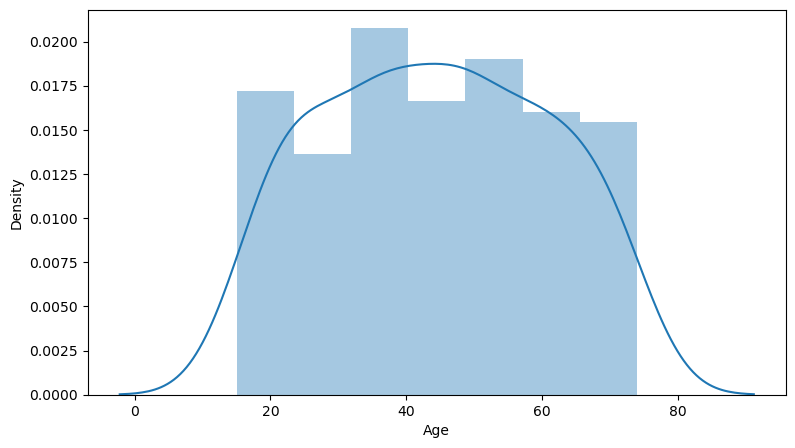

In [8]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

In [9]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

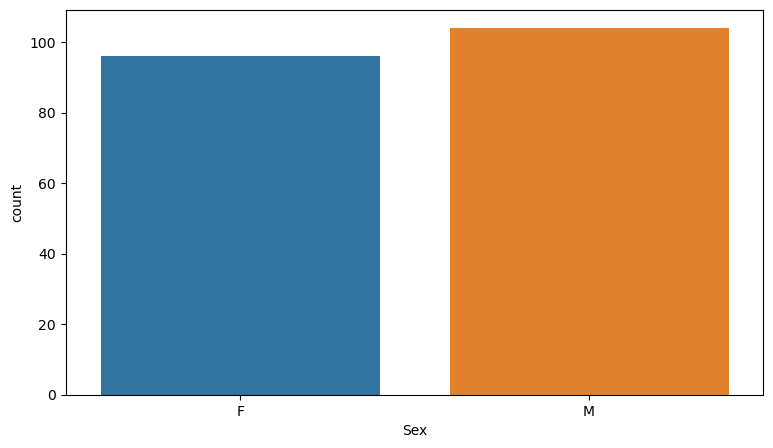

In [10]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

In [11]:
df.BP.value_counts()


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

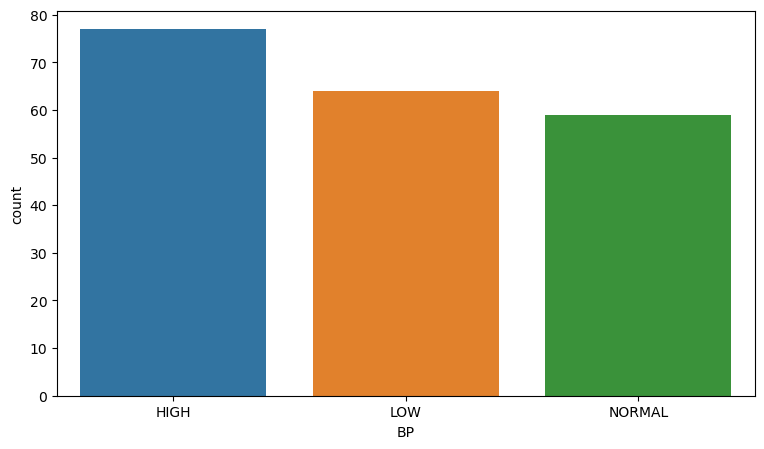

In [12]:
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

In [13]:
df.Cholesterol.value_counts()


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

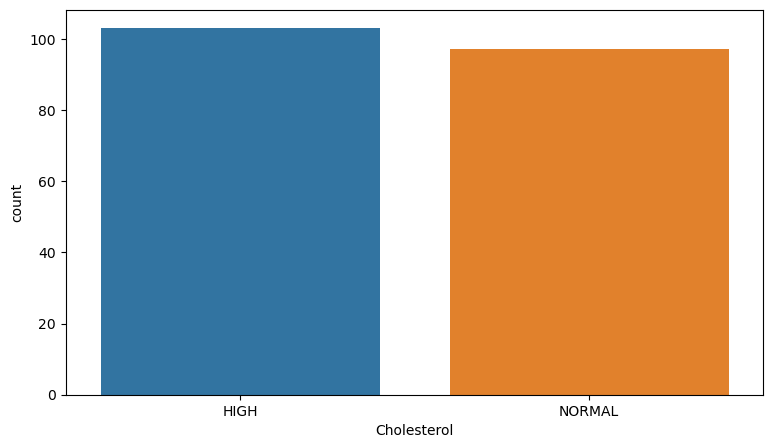

In [14]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

In [15]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.08448499999999


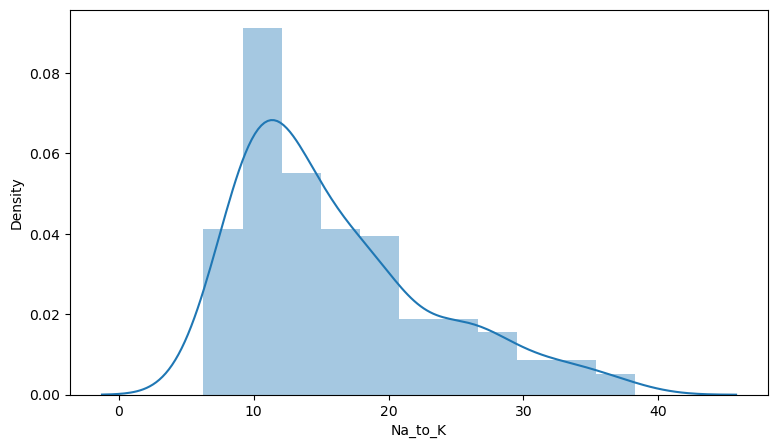

In [16]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

In [17]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

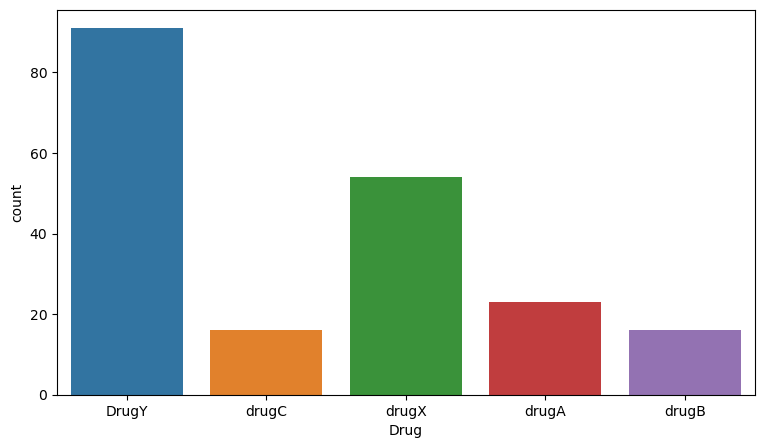

In [18]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

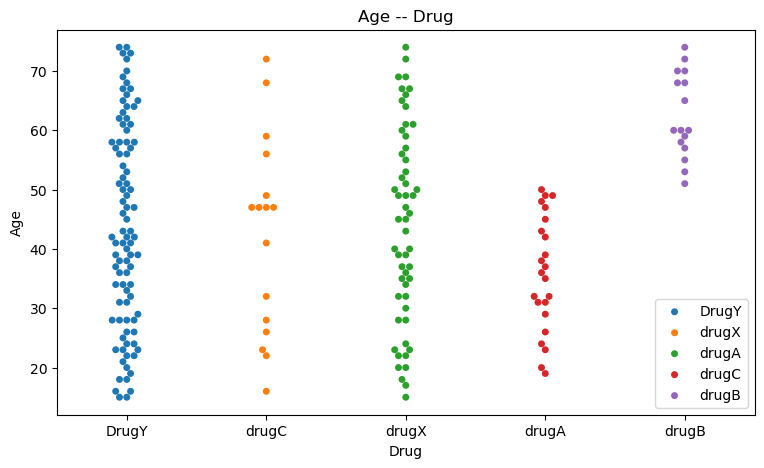

In [19]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [20]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


In [21]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


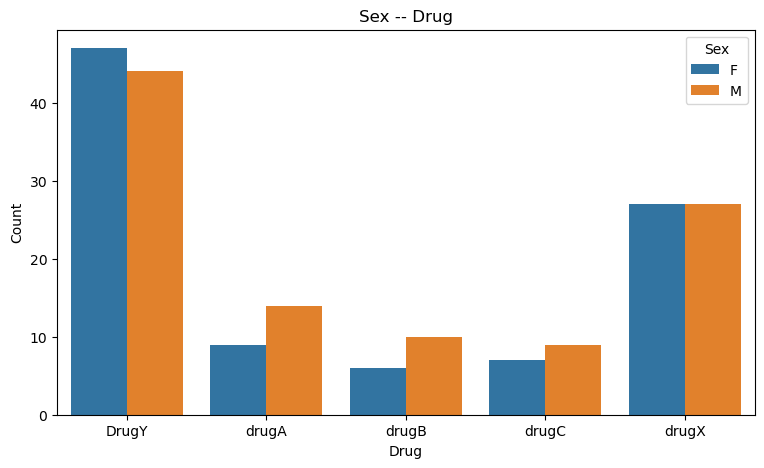

In [22]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

In [23]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


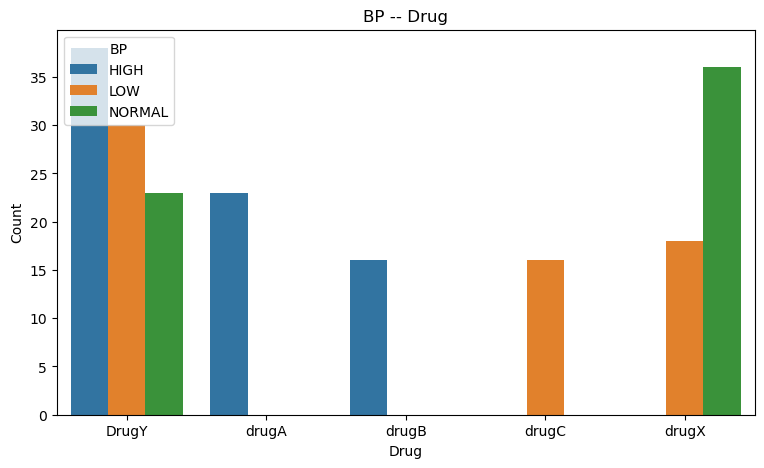

In [24]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

In [25]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


In [26]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


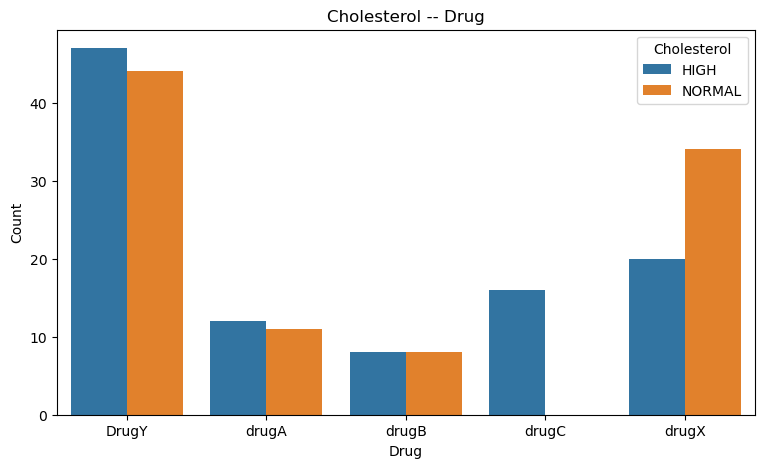

In [27]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

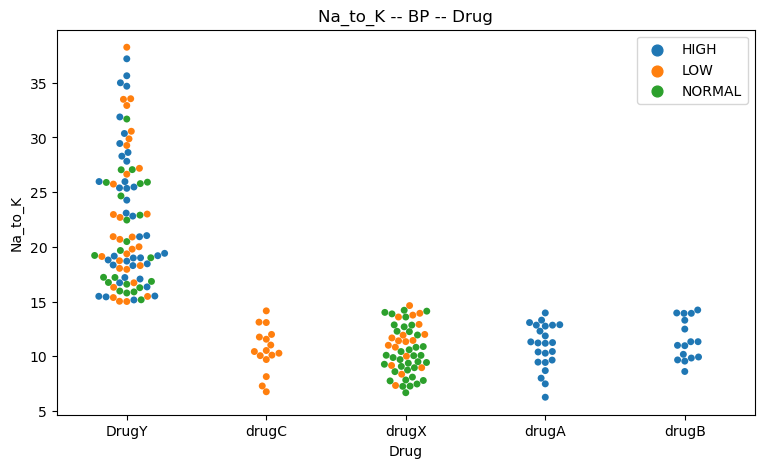

In [28]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

In [29]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [30]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_K_Bigger_Than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


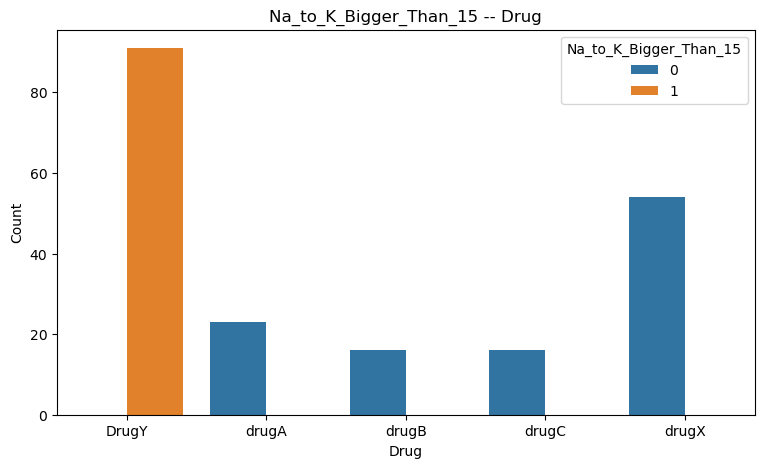

In [31]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)
    df.head()

In [33]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


In [34]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.59375
Test Score: 0.65


In [36]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

In [38]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train Score: 0.7625
Test Score: 0.7


In [39]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(x_test,y_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.98125
Test Score: 0.975


In [41]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

In [44]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

Hyperparameters: {'criterion': 'entropy', 'n_estimators': 100}
Train Score: 0.9875
Test Score: 0.975


In [45]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
KNN Default Train Score,0.59375
KNN GridSearch Train Score,0.76250
Random Forest Default Train Score,0.98125


In [46]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
KNN Default Test Score,0.650
KNN GridSearch Test Score,0.700
Random Forest Default Test Score,0.975


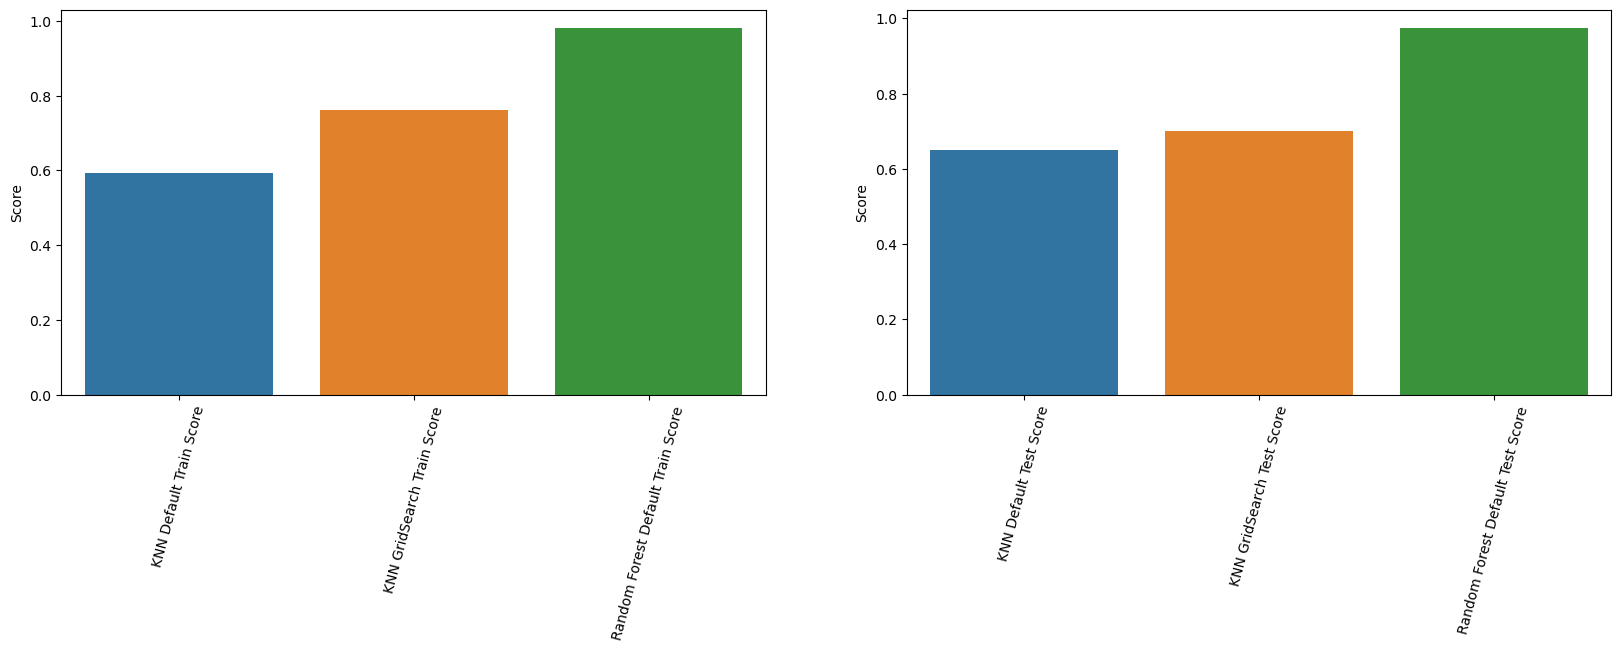

In [47]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()